
===== RESUMEN SEMANAL =====

Temperaturas registradas durante la semana:
Lunes: 10.0°C
Martes: 20.0°C
Miércoles: 15.0°C
Jueves: 12.0°C
Viernes: 20.0°C
Sábado: 18.0°C
Domingo: 5.0°C

Promedio semanal de temperatura: 14.29°C


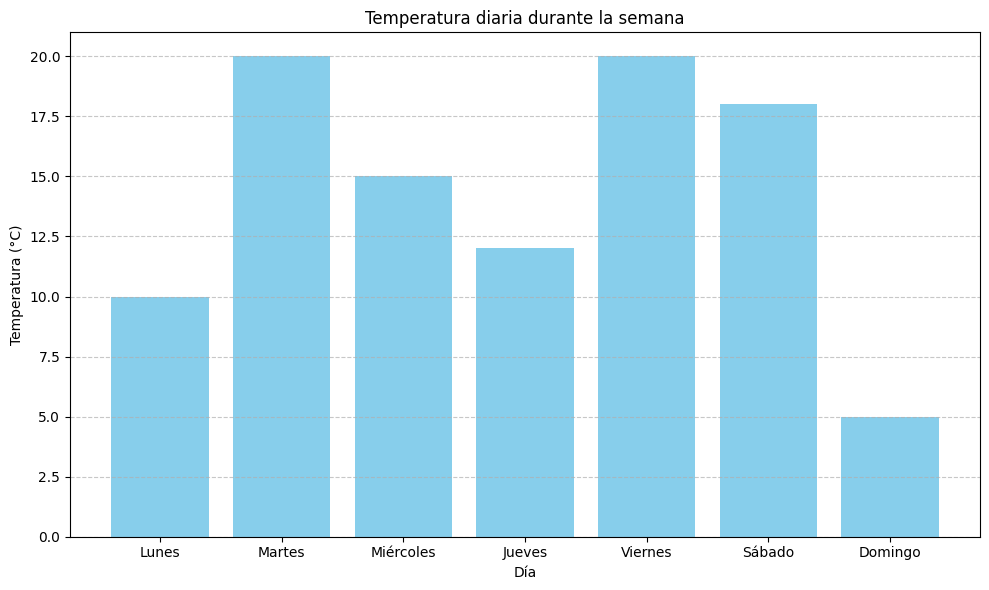

In [5]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

# Clase abstracta para representar un clima genérico
class ClimaBase(ABC):
    @abstractmethod
    def obtener_datos(self):
        pass

    @abstractmethod
    def mostrar_info(self):
        pass

    @abstractmethod
    def obtener_temperatura(self):
        pass


# Clase concreta que representa el clima de un día específico
class DiaClima(ClimaBase):
    def __init__(self, dia, temperatura):
        self.__dia = dia
        self.__temperatura = temperatura

    def obtener_datos(self):
        return (self.__dia, self.__temperatura)

    def mostrar_info(self):
        print(f"{self.__dia}: {self.__temperatura}°C")

    def obtener_temperatura(self):
        return self.__temperatura

    def obtener_dia(self):
        return self.__dia


# Clase base que agrupa los días de la semana
class SemanaClima:
    def __init__(self):
        self._dias = []

    def agregar_dia(self, dia_clima: ClimaBase):
        if isinstance(dia_clima, ClimaBase):
            self._dias.append(dia_clima)

    def mostrar_todas(self):
        print("\nTemperaturas registradas durante la semana:")
        for dia in self._dias:
            dia.mostrar_info()

    def calcular_promedio(self):
        if not self._dias:
            return 0
        total = sum(dia.obtener_temperatura() for dia in self._dias)
        return total / len(self._dias)

    def obtener_datos_grafico(self):
        # Devuelve dos listas: días y temperaturas
        dias = [dia.obtener_dia() for dia in self._dias]
        temperaturas = [dia.obtener_temperatura() for dia in self._dias]
        return dias, temperaturas


# Clase hija que agrega funcionalidad de resumen gráfico
class SemanaClimaDetallada(SemanaClima):
    def mostrar_resumen(self):
        self.mostrar_todas()
        promedio = self.calcular_promedio()
        print(f"\nPromedio semanal de temperatura: {promedio:.2f}°C")

    def graficar_temperaturas(self):
        dias, temperaturas = self.obtener_datos_grafico()
        plt.figure(figsize=(10, 6))
        plt.bar(dias, temperaturas, color='skyblue')
        plt.title("Temperatura diaria durante la semana")
        plt.xlabel("Día")
        plt.ylabel("Temperatura (°C)")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


# --- Programa Principal ---

dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
semana = SemanaClimaDetallada()

for dia in dias_semana:
    while True:
        try:
            temp = float(input(f"Ingrese la temperatura del día {dia}: "))
            semana.agregar_dia(DiaClima(dia, temp))
            break
        except ValueError:
            print("Por favor, ingresa un número válido.")

# Mostrar resumen y graficar
print("\n===== RESUMEN SEMANAL =====")
semana.mostrar_resumen()
semana.graficar_temperaturas()
